<a href="https://colab.research.google.com/github/imool5/road_sign/blob/master/Road_signs_d1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
cd ..

/content


In [0]:
mkdir -p 'drive/My Drive/Colab Notebooks/matrix/matrix_three'

In [42]:
cd 'drive/My Drive/Colab Notebooks/matrix/matrix_three'

/content/drive/My Drive/Colab Notebooks/matrix/matrix_three


In [43]:
pwd

'/content/drive/My Drive/Colab Notebooks/matrix/matrix_three'

In [44]:
Git_Token = 'b53f23cd40230d4f20f2f362a448135516792405'
Git_Url = 'https://{0}@github.com/imool5/road_sign.git'.format(Git_Token)
Git_Url

'https://b53f23cd40230d4f20f2f362a448135516792405@github.com/imool5/road_sign.git'

In [45]:
pwd


'/content/drive/My Drive/Colab Notebooks/matrix/matrix_three'

In [46]:
!git clone $Git_Url

Cloning into 'road_sign'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (5/5), done.


In [47]:
ls

road_sign/


In [48]:
cd road_sign/

/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/road_sign


In [0]:
!mkdir data

In [50]:
cd data

/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/road_sign/data


In [51]:
!curl -L http://bit.ly/train_road_sign -o train.p

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   141  100   141    0     0   4548      0 --:--:-- --:--:-- --:--:--  4548
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  102M  100  102M    0     0  31.3M      0  0:00:03  0:00:03 --:--:-- 51.5M


In [52]:
!curl -L http://bit.ly/test_road_sign -o test.p

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   140  100   140    0     0   2413      0 --:--:-- --:--:-- --:--:--  2413
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 12.9M  100 12.9M    0     0  8473k      0  0:00:01  0:00:01 --:--:-- 17.8M


In [53]:
!curl -L http://bit.ly/dw_signnames -o signnames.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   147  100   147    0     0   5250      0 --:--:-- --:--:-- --:--:--  5250
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   986  100   986    0     0   1165      0 --:--:-- --:--:-- --:--:--  1165


In [54]:
ls


signnames.csv  test.p  train.p


**DAY 2**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [57]:
cd '/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/road_sign'

/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/road_sign


In [59]:
ls data

signnames.csv  test.p  train.p


In [60]:
train = pd.read_pickle('data/train.p')
train.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [61]:
X_train, y_train = train['features'], train['labels']
X_train.shape, y_train.shape

((34799, 32, 32, 3), (34799,))

In [0]:
pd.read_csv('signnames.csv').sample(10)

,a,b
32,32,End of all speed and passing limits
21,21,Double curve
27,27,Pedestrians
2,2,Speed limit (50km/h)
4,4,Speed limit (70km/h)
38,38,Keep right
30,30,Beware of ice/snow
41,41,End of no passing
42,42,End of no passing by vehicles over 3.5 metric ...
35,35,Ahead only


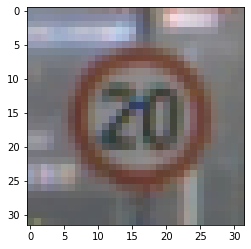

In [65]:
plt.imshow(X_train[10000])

In [66]:
signs = pd.read_csv('data/signnames.csv')
signs.head()

,a,b
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [68]:
dict_signs=signs.to_dict()['b']
dict_signs[30]

'Beware of ice/snow'

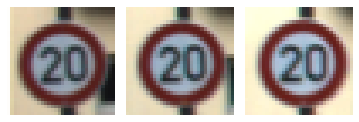

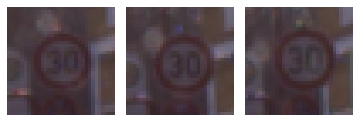

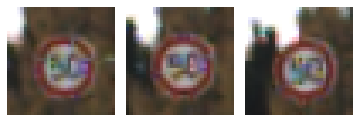

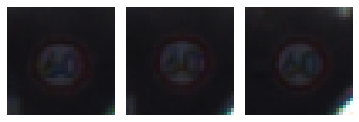

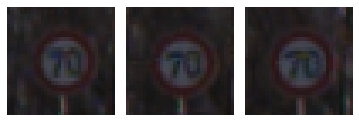

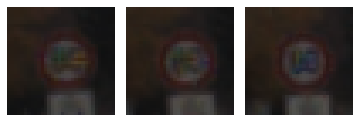

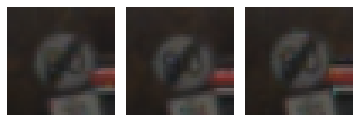

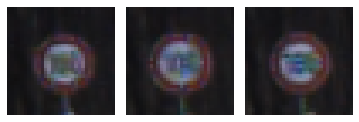

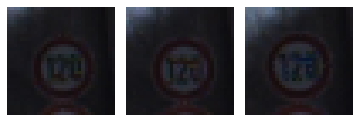

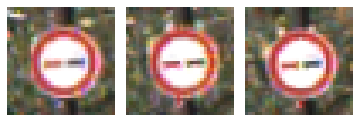

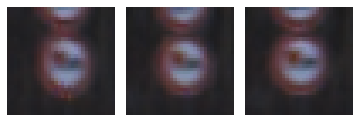

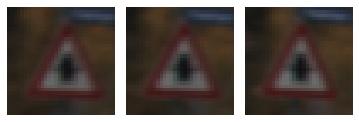

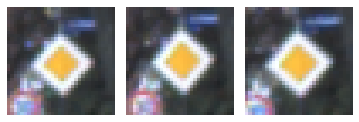

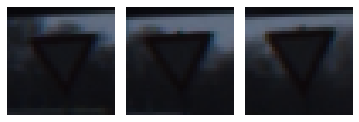

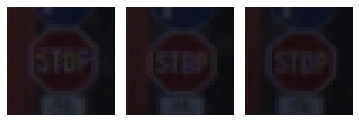

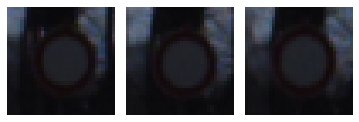

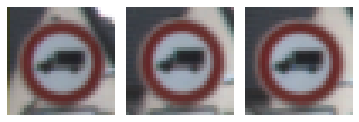

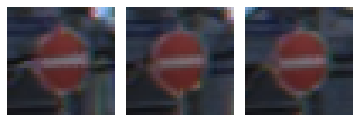

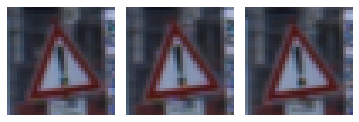

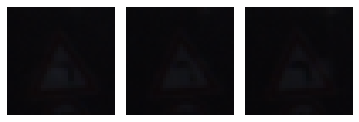

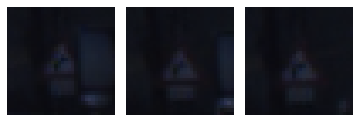

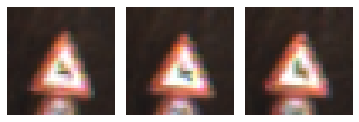

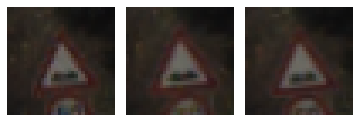

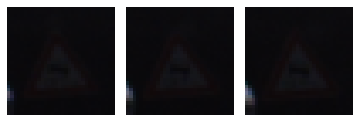

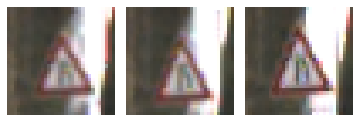

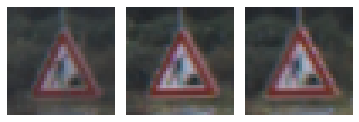

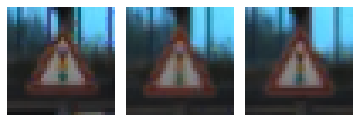

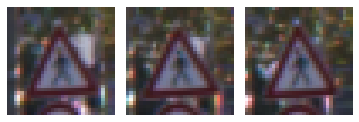

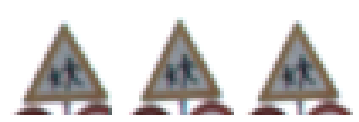

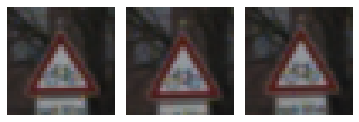

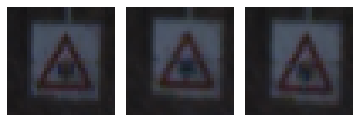

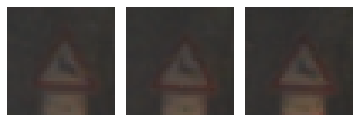

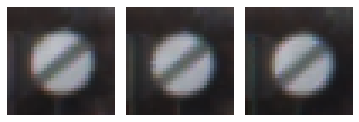

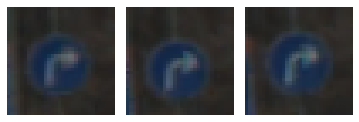

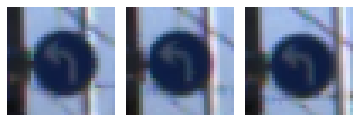

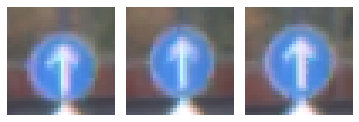

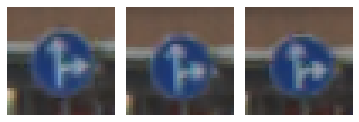

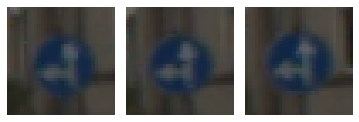

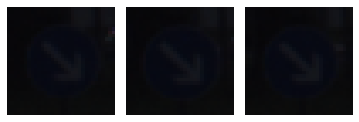

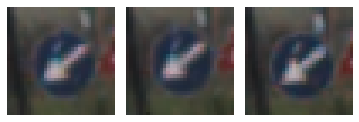

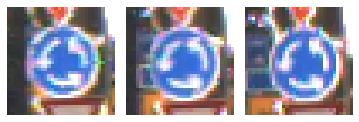

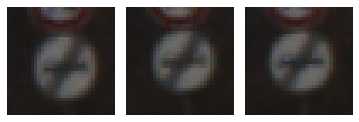

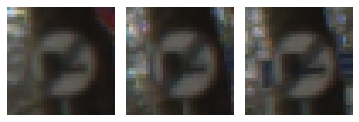

In [79]:
for id_sign in dict_signs.keys():
  given_signs=X_train[y_train==id_sign]
  plt.figure(figsize=(15,5))
  for i in range(3):
    plt.subplot('19{0}'.format(i+1))
    plt.imshow(given_signs[i])
    plt.axis('off')
  plt.tight_layout()
  plt.show()

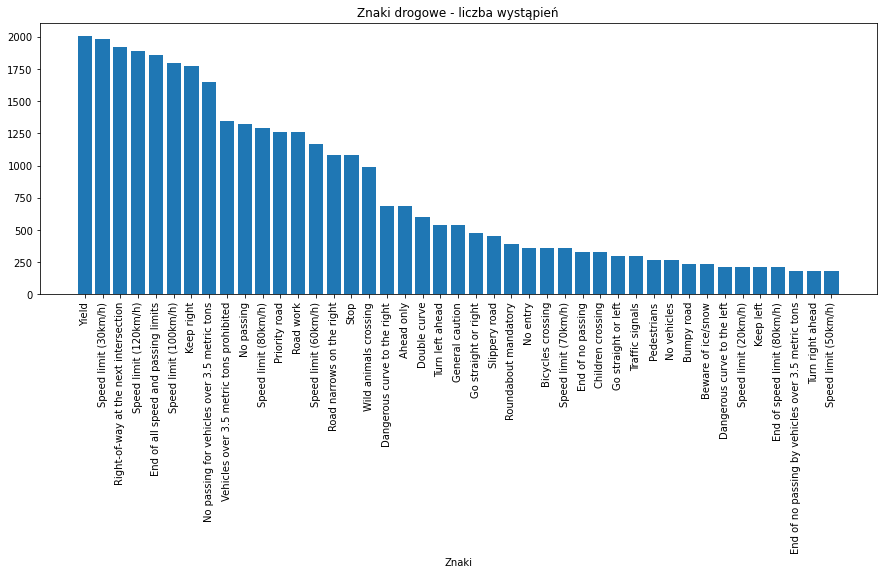

In [93]:
cnt = Counter(y_train).most_common()
id_labels,cnt_labels = zip(*cnt)
ids = range(len(id_labels))

plt.figure(figsize=(15,5))
plt.bar(ids, cnt_labels)

plt.xlabel('Znaki')
labels=[dict_signs[id_labels[id_]] for id_ in id_labels]
plt.xticks(ids, labels,rotation='vertical' )
plt.title('Znaki drogowe - liczba wystąpień')
plt.show()